# Case_study_4_5

Vanilla NN for solving the XOR problem

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/OTBD/main/content/init.py
import init; init.init(force_download=False)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from local.lib.utils import forward, backward

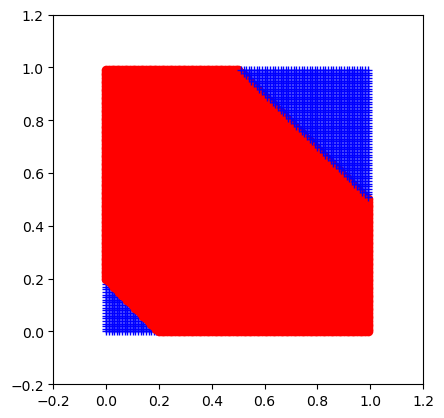

In [20]:

# Main parameters
mu=0.1                 # Step size
Ns=100000              # Number of samples
Nh=2                   # Number of neurons hidden layer
Ni=2                   # Number of inputs
No=1                   # Number of outputs

# Defining the input and the desired signals
x1=np.random.randint(0, 2, size = (1,Ns+1))  # Input signal 1
x2=np.random.randint(0, 2, size = (1,Ns+1))  # Input signal 2
x=np.r_[x1,x2];
y=np.logical_xor(x1,x2);                     # Desired signal
y = y.astype(int).flatten()
# Defining the variables (weights and bias)
W1=np.zeros((Nh,Ni,Ns+1))            # Weights hidden layer
W2=np.zeros((No,Nh,Ns+1))            # Weights output layer
W1[:,:,0]=np.random.rand(Nh,Ni)      # Initialization
W2[:,:,0]=np.random.rand(No,Nh)      # Initialization
b1=np.zeros((Nh,Ns+1))               # Bias hidden layer
b1[:,0]=np.random.rand(Nh)           # Iitialization
b2=np.zeros((No,Ns+1));              # Bias output layer
b2[:,0]=np.random.rand(No)           # Initialization
tipo='linear'                        # Output nonlinearity
e=np.zeros(Ns)                       # Error signal
out=np.zeros(Ns)                     # Output signal


# Loop along the samples including the forward and backward steps
for k in range(Ns):
    z0=x[:,k]
    z1,z2,_,_=forward(W1[:,:,k],W2[:,:,k],b1[:,k],b2[:,k],z0,tipo)
    e[k]=y[k]-z2
    out[k]=z2
    delta2, delta1=backward(W2[:,:,k],z1,z2,e[k],tipo);
    W2[:,:,k+1]=W2[:,:,k]+2*mu*delta2*z1.T
    b2[0,k+1]=b2[0,k]+mu*2*delta2
    W1[:,:,k+1]=W1[:,:,k]+mu*2*delta1*z0;
    b1[:,k+1]=b1[:,k]+mu*2*delta1.flatten();


W2_out=W2[:,:,Ns]
b2_out=b2[0,Ns]
W1_out=W1[:,:,Ns]
b1_out=b1[:,Ns]

# How to present results    
x_test=np.arange(0,1,.01)
X,Y=np.meshgrid(x_test,x_test)
out_func=np.zeros_like(X)
for k in range(len(x_test)):
    for kk in range(len(x_test)):
        z0=np.stack([X[k,kk],Y[k,kk]])
        _, y2, _, _=forward(W1_out,W2_out,b1_out,b2_out,z0,tipo)
        if y2>0.5: 
            plt.plot(X[k,kk],Y[k,kk],marker='o',color='r', linewidth = 3)
        else:
            plt.plot(X[k,kk],Y[k,kk],marker='+',color='b', linewidth = 3)
plt.axis([-.2, 1.2, -.2, 1.2])        
plt.gca().set_aspect('equal')
plt.show()



